In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from scipy.stats import multivariate_normal

# Punto 1: Filtrado de señal ruidosa

Las mediciones de temperatura en un proceso físico se modelan a través de una variable aleatoria continua $Y$ que sigue una distribución Gaussiana con media $30$ y varianza $1.5$. Suponga que observamos $Y$ con un error aleatorio $W$ aditivo. En particular, se observa la variable aleatoria $X = Y+W$, donde el ruido $W$ se modela como una variable Gaussiana con media $0$ y varianza $1$. La variable $W$ es independiente de $Y$.

## a) Genere observaciones de $Y$ y el valor correspondiente de $X$, y grafíquelas como puntos 2D en un plano $X$ vs. $Y$.

Text(0.5, 1.0, '$X$ vs. $Y$')

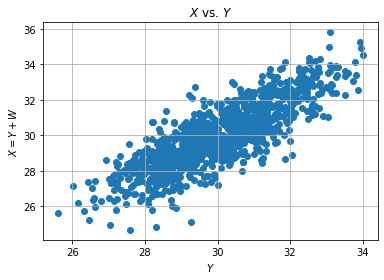

In [2]:
# Se declaran los parámetros conocidos de la variable aleatoria (VA) Y.
muY = 30
sigmaY = 1.5

# Se declaran los parámetros conocidos de la VA W.
muW = 0
sigmaW = 1

# Se declaran los parámetros conocidos de la VA X.
muX = muY + muW
sigmaX = sigmaY + sigmaW # Ya que Y y W son VAs independientes y por tanto no correlacionadas.

# Se generan 1000 muestras de las VAs Y y W.
Y = np.random.normal(muY, sigmaY, 1000)
W = np.random.normal(muW, sigmaW, 1000)

# Se generan las muestras de la VA X
X = Y + W

# Se grafica Y como la variable independiente y X como la variable dependiente.
plt.scatter(Y, X)
plt.grid()
plt.xlabel(r'$Y$')
plt.ylabel(r'$X = Y + W$')
plt.title(r'$X$ vs. $Y$')

## b) Encuentre la distribución Gaussiana multivariable del vector $Z = [Y, X]^T$. Grafique las curvas de nivel de la PDF de $Z$ en una figura con los datos encontrados en a) traslapados

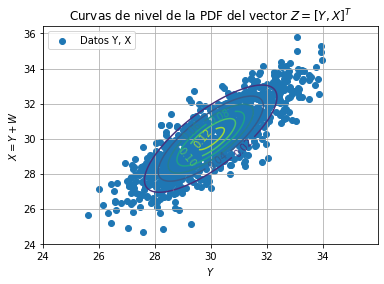

In [3]:
# Se genera el vector de medias del vector aleatorio Z.
muZ = [muY, muX]

# Se declara la covarianza entre Y y X como sigmaY y con base en esta información se construye la matriz de covarianza Cz.
# covYX = cov(Y, Y+W) = cov(Y, Y) + cov(Y, W) = simgaY + 0 (no correlacionadas por ser independientes)
covYX = sigmaY
Cz = np.array([[sigmaY, covYX], [covYX, sigmaX]])

# Se generan vectores con valores de 'x' y 'y' para generar una malla (X1, Y1) sobre la cual dibujar las curvas de nivel.
step = 0.025
x = np.arange(24, 35, step)
y = np.arange(24, 36, step)

# Se genera la malla (X1, Y1). X1 y Y1 son matrices que representan los puntos en el plano R^2.
X1, Y1 = np.meshgrid(x, y)

# Se usa la función multivariate_normal para definir la función Gaussiana en el eje Z que se genera con los diferentes datos en Y1 y X1.
# Se define el vector Z como la pdf Gaussiana representada por el vector de medias muZ y la matriz de covarianza Cz.
pos = np.dstack((Y1, X1))
rv = multivariate_normal(muZ, Cz)
Z = rv.pdf(pos)

# Se grafican las curvas de nivel de la pdf de Z junto con los datos X y Y entregados en el archivo de texto.
fig, ax = plt.subplots()
CS = plt.contour(Y1, X1, Z)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel(r'$Y$')
ax.set_ylabel(r'$X=Y+W$')
ax.set_title(r'Curvas de nivel de la PDF del vector $Z = [Y, X]^T$')
ax.grid()
plt.scatter(Y, X)
plt.legend(['Datos Y, X'])
plt.show()

## c) Encuentre la función del estimador lineal MMSE (es decir, LMMSE) de $Y$ basado en $X$.

El estimador lineal MMSE de la variable aleatoria $Y$ basado en $X$ está dado por la expresión

$$Y_{hat}(x) = E[Y] + \frac{\text{cov}(Y, X)}{\sigma_X^2}[X - E[X]]$$

Como $X=Y+W$ es independiente de $W$ se sabe que:
- $E[X] = E[Y] + E[W]$ 
- $\sigma_X^2 = \text{var}(Y+W) = \sigma_Y^2 + \sigma_W^2$
- $\text{cov}(Y, X) = \text{cov}(Y,Y+W) = \text{cov}(Y, Y) + \text{cov}(Y, W) = \sigma_Y^2 + 0 = \sigma_Y^2 $ 

In [4]:
# Se define la función que calcula la estimación de la VA Y con base en la VA X. 
def Yhat(muY, muX, sigmaX, sigmaY, X):
    return muY + (sigmaY/sigmaX)*(X-muX)

# Se crean diferentes valores de X para estimar el valor de la VA Y.
X_est = np.linspace(0, 50, 50)
Yh = []

# Para cada valor de X en X_est, calcular su Y estimado correspondiente.
for i in range(len(X_est)):
    Yh.append(Yhat(muY, muX, sigmaX, sigmaY, X_est[i]))

## d) Grafique la función resultante con respecto a los posibles valores de $X$, es decir, grafique $Y_{hat}$ vs $X$ (donde $Y_{hat}$ es la estimación de $Y$). Inteprete este resultado basado en el hecho de que $X = Y+W$, es decir, de que se tienen observaciones ruidosas de una variable.

Text(0.5, 1.0, 'Estimador LMMSE de $Y$ basado en $X$')

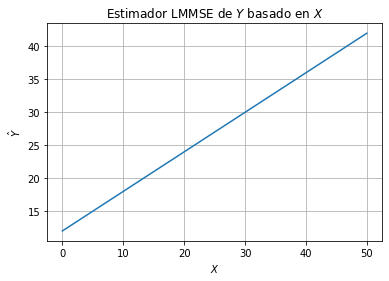

In [5]:
# Se grafica el estimador lineal MMSE creado en las celdas anteriores.
plt.plot(X_est, Yh)
plt.grid()
plt.xlabel(r'$X$')
plt.ylabel(r'$\^{Y}$')
plt.title(r'Estimador LMMSE de $Y$ basado en $X$')

Se obtuvo una recta como era de esperarse y se puede decir que, teniendo los valores de $X$, se pueden estimar los valores de la variable $Y$ ($Y_{hat}(x)$) de acuerdo a la ecuación de esta recta, es decir, a través de

$$Y_{hat}(x) = E[Y] + \frac{\text{cov}(Y, X)}{\sigma_X^2}[X - E[X]]$$

$$Y_{hat}(x) = 30 + \frac{1.5}{2.5}[X - 30]$$

$$Y_{hat}(x) = \frac{3}{5}X + 12$$

Esta recta es una estimación razonable de la variable aleatoria $Y$, dado que se sabe que es una variable ruidosa (X está contaminada con un ruido aleatorio). Sin embargo, es precisamente debido a esta contaminación que la estimación no va a ser perfecta y puede llegar a arrojar valores de $Y$ que están un poco alejados de los valores observados en la realidad.